# Main Method path invariant

## Imports

In [70]:
import sys
sys.path.append("../../src")
%reload_ext autoreload
%autoreload 2
from helpers import graph
from path_invariants import *
from math import sqrt

## Lower-layer removal method

This method adds all successor graphs without lower-layers. And this is able to understand interleaving, hence, concurrentcy!

In [71]:
A = "pqrst"
B = "xyz"
C = "ABCDE"

Log = [
    A, A+B, B, 
    A+B*10, 
    '...' + A + '...' + B,
    C,
    'pxqrstyzpxyqrstz'
]

In [72]:
G=successor_graph("")

# For each trace on the log
for T in Log:
    
    # Take his successor graph
    H = successor_graph(T)
                
    # Add merge all resulting graphs            
    G = add_graphs(G, H)

# The invariants are obtained by search paths in cliques for every layer in the resulting graph
invariants=[]
all_weights = set( [G[u][v]["weight"] for u, v in G.edges() ] )
for f in all_weights:
    invariants += paths_in_cliques( f_layer(f, G) )
    
# The only part now is to assign correct r. If w=r(r+1)/2 ...
# Open Problem
invariants

[(1, ['A', 'B', 'C', 'D', 'E']),
 (7, ['p', 'q', 'r', 's', 't']),
 (61, ['x', 'y', 'z'])]

In [73]:
invariants

[(1, ['A', 'B', 'C', 'D', 'E']),
 (7, ['p', 'q', 'r', 's', 't']),
 (61, ['x', 'y', 'z'])]

In [74]:
path_invariants(Log)

[(1, ['A', 'B', 'C', 'D', 'E']),
 (7, ['p', 'q', 'r', 's', 't']),
 (61, ['x', 'y', 'z'])]

In the combined successor graph for all traces in the logs, the f-layers are the following

In [75]:
# Adding some perfect noise:
Log.append("234432")
path_invariants(Log)

[(1, ['A', 'B', 'C', 'D', 'E']),
 (7, ['p', 'q', 'r', 's', 't']),
 (61, ['x', 'y', 'z'])]

In [76]:
# Adding some perfect noise but splitted in two traces
Log.append("789789789789")
Log.append("987")
path_invariants(Log)

[(1, ['A', 'B', 'C', 'D', 'E']),
 (7, ['p', 'q', 'r', 's', 't']),
 (61, ['x', 'y', 'z'])]

### I really need to include paths from loops... look at this, all <- pq xy

In [97]:
# Artifacts! Too few examples to determine this
Log = [ 
    "xpqpqpqpqy",
]
path_invariants(Log)

[(3, ['x', 'y']), (36, ['p', 'q'])]

In [98]:
# Artifacts! Too few examples to determine this
Log = [ 
    "xpqypqpxqpqy",
]
path_invariants(Log)

[(36, ['p', 'q']), (10, ['x', 'y'])]

In [99]:
# Artifacts! Too few examples to determine this
Log = [ 
    "xpqpqpqpqyxpqpqpqpqy",
]
path_invariants(Log)

[(136, ['p', 'q']), (10, ['x', 'y'])]

## Earlier try using loop detection in each trace 

If no interleaving is present, just path concatenation, the method of search loops and adds the equivalent rPaths is enough.

In [78]:
def infer_paths_by_combining_loops(T):
    G=successor_graph("")
    for T in Log:
        paths = paths_from_trace(T)

        # Here I sum the multi path graph
        for r, P in paths:
            for i in range(0,int(r)):
                G = add_graphs(G, successor_graph(P) )

    # Search paths in every layer
    weights = set( [G[u][v]["weight"] for u, v in G.edges() ] )

    # for f in weights:
    #     graph( f_layer(f, G) )

    invariants=[]
    for f in weights:
        invariants += paths_in_cliques( f_layer(f, G) )

    return invariants

In [79]:
A = "pq"
B = "xy"
C = "ABCD"

Log = [
    A, A+B, B, 
    A+B*10, 
    '...' + A + '...' + B,
    C
]

In [80]:
infer_paths_by_combining_loops(Log)

[(1, ['A', 'B', 'C', 'D']), (4, ['p', 'q']), (13, ['x', 'y'])]

This method works well ONLY if it contains complete paths without symbols in the middle, otherwise it fails because the loop detetcion *still* fails with interleaving. See what happens if an interleaved A, B merge is added:

In [81]:
Log.append("pxqypxyq") # interleaved sequence

In [82]:
infer_paths_by_combining_loops(Log)

[(1, ['A', 'B', 'C', 'D'])]

In [84]:
paths_from_trace("pxqypxyq")

[(1.0, ['p', 'x', 'q']), (1.0, ['p', 'x', 'y'])]

## Nice drawings

In [41]:
A = "pq"
B = "xy"
C = "ABCD"

Log = [
    A, A+B, B, 
    A+B*10, 
    '...' + A + '...' + B,
    C,
    'pxqypxyq'
]

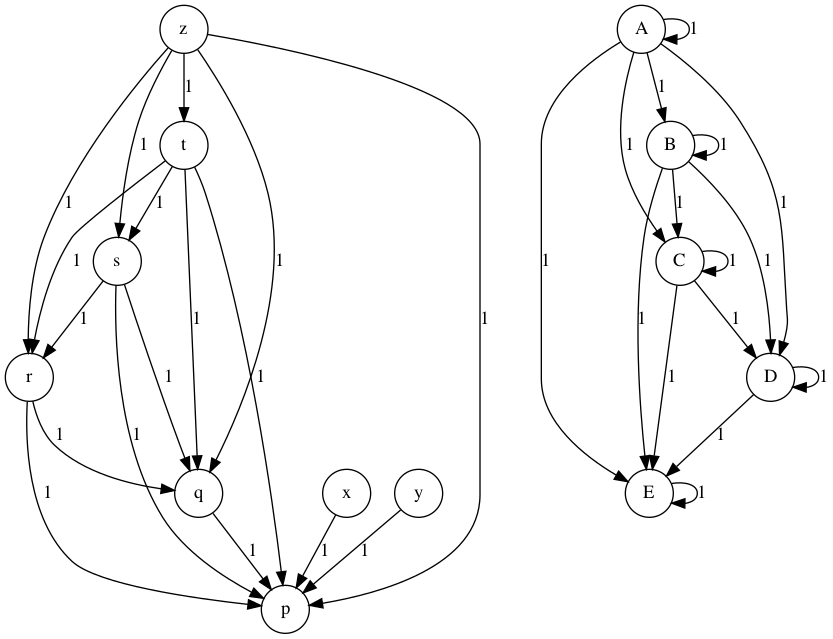

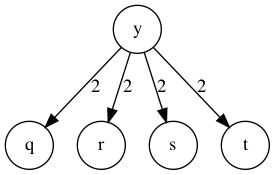

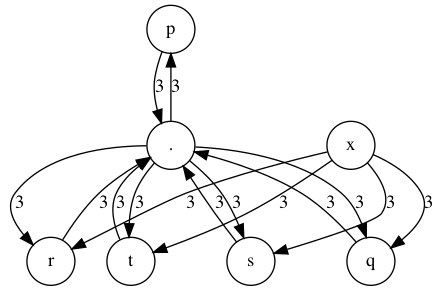

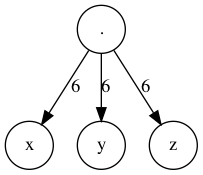

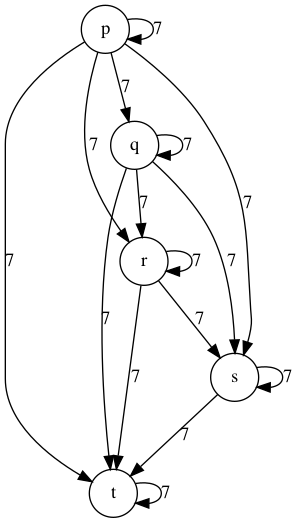

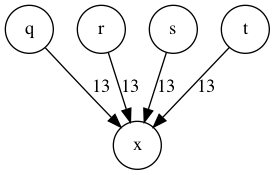

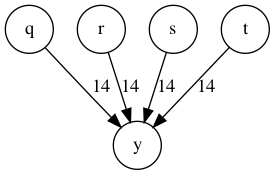

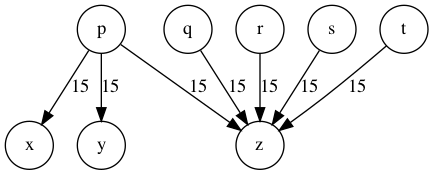

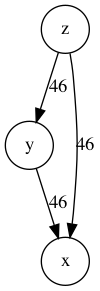

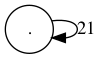

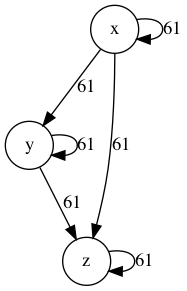

In [49]:
G=successor_graph("")
for T in Log:
    G = add_graphs(G, successor_graph(T))

# f-cuts of combined graph
all_weights = set( [G[u][v]["weight"] for u, v in G.edges() ] )
for f in all_weights:
    graph( f_layer(f, G) )